# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

# Overall model

Insert propper model in the format below -REPLACE!!!

$$
\begin{align*}
c^{\star},\ell^{\star} & = \arg\max_{c,\ell}\log(c)-\nu\frac{\ell^{1+\frac{1}{\varepsilon}}}{1+\frac{1}{\varepsilon}}\\
 & \text{s.t.} \\
x & = m+w\ell-\left[\tau_{0}w\ell+\tau_{1}\max\{w\ell-\kappa,0\}\right] \\
c & \in [0,x] \\
\ell & \in [0,1]
\end{align*}
$$

where $c$ is consumption, $\ell$ is labor supply, $m$ is cash-on-hand,
$w$ is the wage rate, $\tau_{0}$ is the standard labor income tax,
$\tau_{1}$ is the top bracket labor income tax, $\kappa$ is the
cut-off for the top labor income bracket, $x$ is total resources,
$\nu$ scales the disutility of labor, and $\varepsilon$ is the Frisch
elasticity of labor supply.

# Imports and setup

In [36]:
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt
from scipy import optimize

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from inauguralproject import ExchangeEconomyClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Explain how you solve the model** (delete?)

In [22]:
# code for solving the model (remember documentation and comments) (DELETE?)

a = np.array([1,2,3])
b = inauguralproject.square(a)
print(b)

[1 4 9]


# Question 1

Explanation...

In [71]:
model = ExchangeEconomyClass()

par = model.par

N = 75
w1A = 0.8
w2A = 0.3
w1B = 1 - w1A
w2B = 1 - w2A

grid_x1A = np.linspace(0,1,N+1)
grid_x2A = np.linspace(0,1,N+1)

possible_x1A = []
possible_x2A = []

for x1A in grid_x1A:
    for x2A in grid_x2A:
        x1B = 1 - x1A
        x2B = 1 - x2A
        uA = model.utility_A(x1A, x2A)
        uB = model.utility_B(x1B,x2B)

        # Check if allocations satisfy the conditions
        if uA >= model.utility_A(w1A,w2A) and uB >= model.utility_B(w1B, w2B):
            possible_x1A.append(x1A)
            possible_x2A.append(x2A)

print(possible_x1A)




[0.08, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.12000000000000001, 0.12000000000000001, 0.12000000000000001, 0.12000000000000001, 0.12000000000000001, 0.12000000000000001, 0.12000000000000001, 0.12000000000000001, 0.12000000000000001, 0.12000000000000001, 0.12000000000000001, 0.12000000000000001, 0.12000000000000001, 0.12000000000000001, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.1333

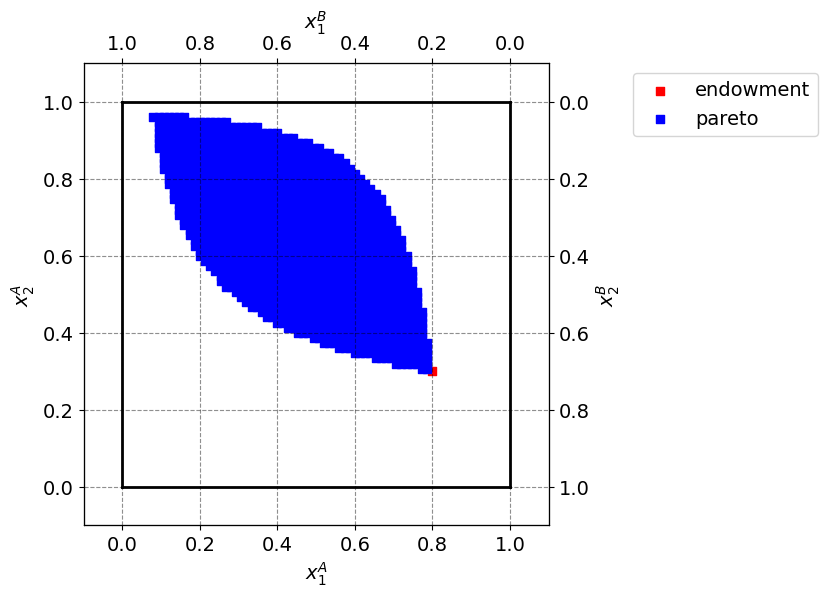

In [72]:
model = ExchangeEconomyClass()

par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='red',label='endowment')
ax_A.scatter(possible_x1A,possible_x2A,marker='s',color='blue',label='pareto')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

Conclusion:

# Question 2

Explanation...

In [ ]:
#code

Conclusion:

# Question 3

Explanation...

In [ ]:
# code

Conclusion:

# Question 4

Explanation...

In [ ]:
#code

Conclusion:

# Question 5

Explanation...

In [ ]:
#code

Conclusion:

# Question 6

Explanation...

In [ ]:
#code

Conclusion:

# Question 7

Explanation...

In [ ]:
#code

Conclusion:

# Question 8

Explanation...

In [ ]:
#code

Conclusion: